In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv("dataset/raw_merged_heart_dataset.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
2177,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
2178,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
2179,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   object 
 4   chol      2181 non-null   object 
 5   fbs       2181 non-null   object 
 6   restecg   2181 non-null   object 
 7   thalachh  2181 non-null   object 
 8   exang     2181 non-null   object 
 9   oldpeak   2181 non-null   float64
 10  slope     2181 non-null   object 
 11  ca        2181 non-null   object 
 12  thal      2181 non-null   object 
 13  target    2181 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 238.7+ KB


In [5]:
# checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# so no null values here

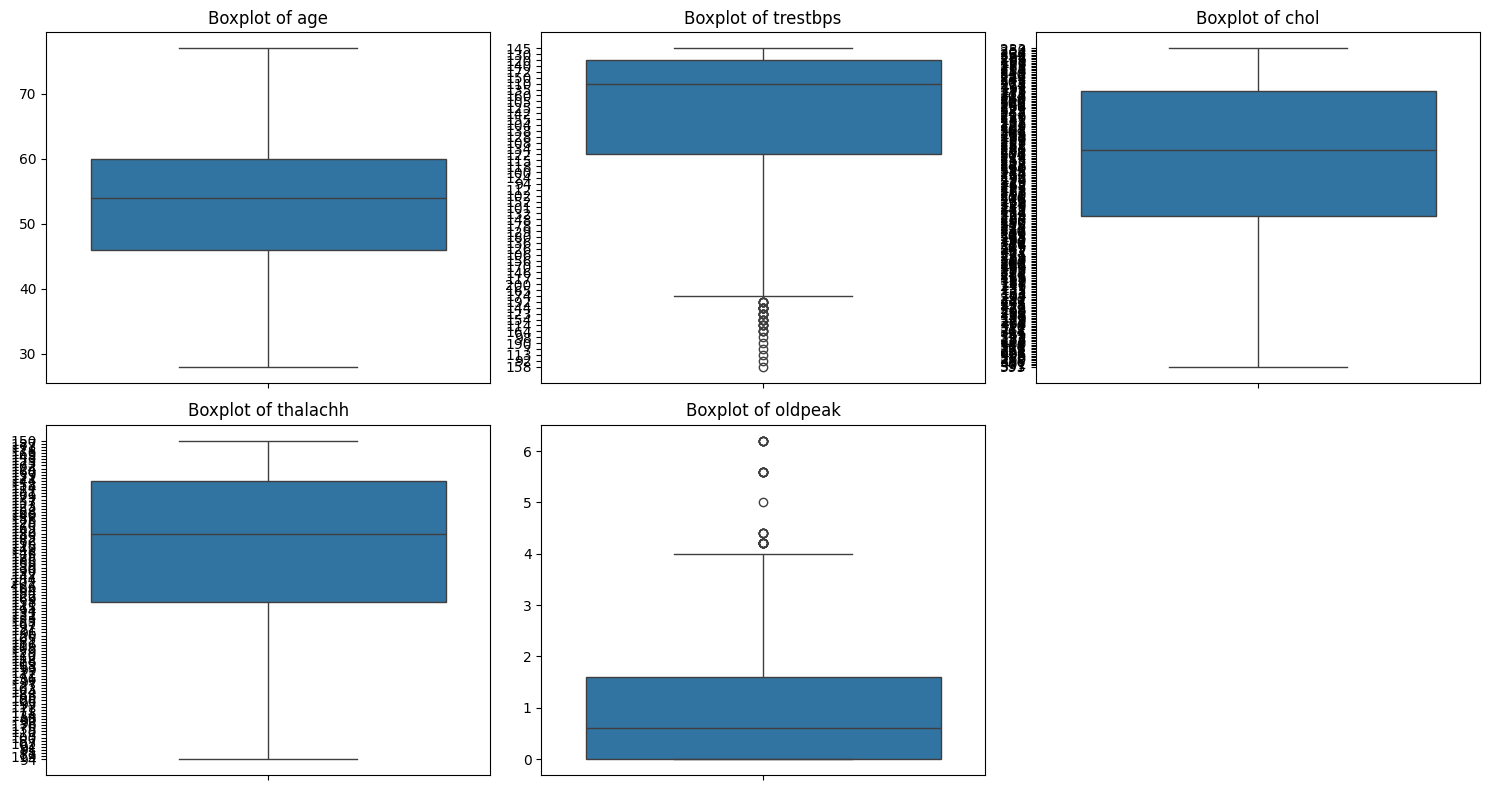

In [8]:
# now looking for outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Define the continuous features to check
continuous_features = ['age', 'trestbps', 'chol', 'thalachh', 'oldpeak']

# Set up the plots
plt.figure(figsize=(15, 8))

for i, feature in enumerate(continuous_features):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns, position i+1
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

#

In [9]:
# so here the outlirs are only persent in the oldpeak
# so we are capping them instead or removing them, as this is the medical data and the high values can be of some importance here also
import numpy as np

# 1. Calculate IQR, Q1, and Q3
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define the Upper and Lower Bounds (1.5 * IQR rule)
# We focus on the upper bound since the boxplot only showed high-end outliers
upper_limit = Q3 + 1.5 * IQR
# lower_limit = Q1 - 1.5 * IQR # Not strictly needed as there are no low-end outliers

# 3. Cap the Outliers in the DataFrame
# Any value greater than the upper_limit is replaced with the upper_limit
df['oldpeak'] = np.where(df['oldpeak'] > upper_limit, upper_limit, df['oldpeak'])

print(f"Original Q1: {Q1:.2f}, Q3: {Q3:.2f}")
print(f"Calculated Upper Capping Limit: {upper_limit:.2f}")
print("Outliers in 'oldpeak' have been capped at this limit.")

Original Q1: 0.00, Q3: 1.60
Calculated Upper Capping Limit: 4.00
Outliers in 'oldpeak' have been capped at this limit.


In [10]:
# viewing the df again
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [11]:
# now see this is a merged column so we can have the '?' instead of missing value and we need to handle them also

In [12]:
import numpy as np

# 1. Global Replacement of '?' with np.nan across the entire DataFrame
# This ensures we catch the hidden missing marker wherever it appears.
# Note: We must re-read the DataFrame or ensure the previous capping/imputation 
# steps are retained on 'df' before this step. Assuming 'df' holds the latest data.
df = df.replace('?', np.nan)

# 2. Re-check for any columns that might have become 'object' type 
# (which happens when strings are present) and force them back to numeric.
# This ensures that all columns that *should* be numeric are numeric.
for col in df.columns:
    # We use errors='coerce' here to turn any non-numeric string (that was NOT '?') into NaN.
    # While potentially aggressive, it ensures the .corr() function will work later.
    df[col] = pd.to_numeric(df[col], errors='coerce')


# 3. Check for ALL Missing Values (including the ones from your previous check)
print("Updated Count of Missing Values Across All Columns:")
print(df.isnull().sum())

Updated Count of Missing Values Across All Columns:
age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalachh      1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
target        0
dtype: int64


In [13]:
# Continuous Features (Impute with Median) : trestbps (1 missing), chol (23 missing),thalachh (1 missing)
# Categorical/Binary Features (Impute with Mode) : fbs (8 missing), restecg (1 missing) ,exang (1 missing), slope (190 missing - High Count), ca (291 missing - High Count), thal (266 missing - High Count)                                                    

In [14]:
# sex, cp, fbs, retecg, exang, slope, ca, thal, target
# see here :
# sex: Gender of the patient. Values: 1 = male, 0 = female.
# fbs: Fasting blood sugar > 120 mg/dl. Values: 1 = true, 0 = false.
# exang: Exercise-induced angina. Values: 1 = yes, 0 = no.
# this 3 are binary columns so no need to apply the OHE on it 

In [15]:
# while see on this colums we need to apply the OHE :
# cp: Chest pain type. Values: 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic.
# restecg: Resting electrocardiographic results. Values: 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy.
# slope: Slope of the peak exercise ST segment. Values: 0 = Upsloping, 1 = Flat, 2 = Downsloping.
# thal: Thalassemia types. Values: 1 = Normal, 2 = Fixed defect, 3 = Reversible defect.
# ca: Number of major vessels (0-3) colored by fluoroscopy. Values: 0, 1, 2, 3.

# as see they are not binary in nature and are nominal so its better to apply OHE here so that it gives better relation understanding

In [16]:
# here i have created a temp_df copy of the dataset to do the temp imputation on the full data and just see the correlation of the data 
# then once i plot the heatmap then i will go back to the original df and split it and then only apply the transformation on it 

In [17]:
temp_df = df
temp_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1
5,57,1,0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1
6,56,0,1,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0,1
7,44,1,1,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1
8,52,1,2,172.0,199.0,1.0,1.0,162.0,0.0,0.5,2.0,0.0,3.0,1
9,57,1,2,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1


In [18]:
# Assuming 'temp_df' is the copy of your DataFrame after capping and '?' -> NaN replacement

# --- Define Imputation Groups ---
continuous_cols = ['trestbps', 'chol', 'thalachh']
categorical_cols = ['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


# 1. Impute Continuous Features with MEDIAN
for col in continuous_cols:
    median_val = temp_df[col].median()
    temp_df[col].fillna(median_val, inplace=True)
    
# 2. Impute Categorical Features with MODE
for col in categorical_cols:
    mode_val = temp_df[col].mode()[0]
    temp_df[col].fillna(mode_val, inplace=True)
    temp_df[col] = temp_df[col].astype(int) # Convert back to int after filling NaNs
    
print("✅ Temporary Imputation Complete on temp_df.")

✅ Temporary Imputation Complete on temp_df.


C:\Users\dhruv\AppData\Local\Temp\ipykernel_10540\2536378925.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_df[col].fillna(median_val, inplace=True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_10540\2536378925.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

C:\Users\dhruv\AppData\Local\Temp\ipykernel_10540\3302077894.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')


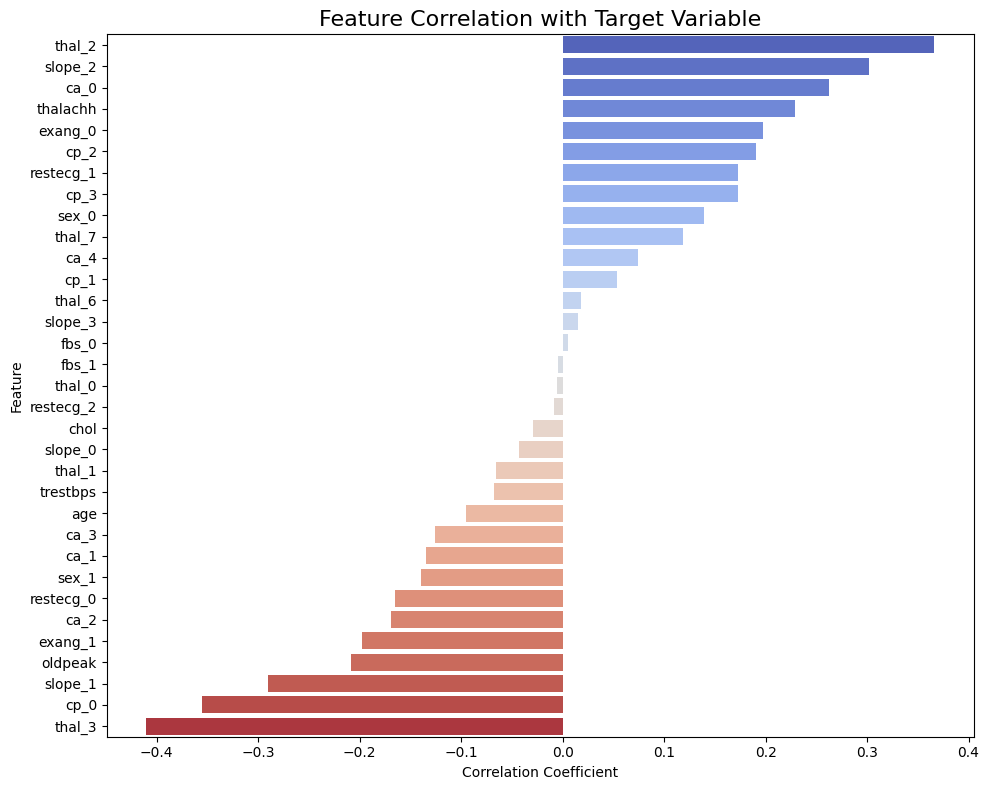


Top 10 Feature Correlations (Absolute Value) with 'target':
thal_3      0.410419
thal_2      0.366171
cp_0        0.354958
slope_2     0.302214
slope_1     0.289974
ca_0        0.262064
thalachh    0.228715
oldpeak     0.208306
exang_0     0.197803
exang_1     0.197803
Name: target, dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify all categorical columns for OHE (including the binary ones)
ohe_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# 1. Apply One-Hot Encoding to the temporary DataFrame
df_corr = pd.get_dummies(temp_df, columns=ohe_cols, drop_first=False)

# 2. Calculate the Correlation Matrix and extract Target correlations
corr_matrix = df_corr.corr()
target_corr = corr_matrix['target'].sort_values(ascending=False).drop('target')

# 3. Plot the Correlation with Target (Barplot)
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')
plt.title('Feature Correlation with Target Variable', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 4. Print the most impactful correlations for analysis
print("\nTop 10 Feature Correlations (Absolute Value) with 'target':")
print(target_corr.abs().sort_values(ascending=False).head(10))

In [20]:
# now as the corelation task done so we need to do the acutal task of imputation and OHE and standar scaler and we do it inside the pipeline

In [21]:
# perprocessing pipeline code 

In [22]:
# so now we apply this pipline here

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# --- 1. Define Feature Groups (Based on Analysis) ---

# Continuous features requiring Median Imputation and Standard Scaling
continuous_features = ['age', 'trestbps', 'chol', 'thalachh', 'oldpeak']

# Categorical/Ordinal features requiring Mode Imputation and One-Hot Encoding (OHE)
# 'sex', 'fbs', 'exang' are binary (0/1) but will be treated as categorical for OHE simplicity
# 'target' is excluded as it is the label
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# --- 2. Separate Features (X) and Target (y) ---

X = df.drop('target', axis=1)
y = df['target']

# --- 3. Create Imputation & Preprocessing Steps ---

# a) Preprocessor for CONTINUOUS features (Median Imputation + Scaling)
continuous_transformer = Pipeline(steps=[
    # Step 1: Impute missing values with the Median of the training set
    ('imputer', SimpleImputer(strategy='median')),
    # Step 2: Scale the imputed continuous data
    ('scaler', StandardScaler())
])

# b) Preprocessor for CATEGORICAL features (Mode Imputation + OHE)
categorical_transformer = Pipeline(steps=[
    # Step 1: Impute missing values with the Mode (most frequent value)
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # Step 2: Apply One-Hot Encoding
    # handle_unknown='ignore' ensures the pipeline doesn't crash if an unexpected category appears during deployment
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# --- 4. Combine Steps using ColumnTransformer ---

# This maps the specific transformers to their specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', continuous_transformer, continuous_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    # 'remainder' is set to 'passthrough' if any columns were not specified, 
    # but we included all X columns here.
    remainder='passthrough' 
)

# --- 5. Split Data into Training and Testing Sets ---

# Stratify ensures the train and test sets have the same proportion of target classes (0 and 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 6. Fit and Transform the Training Data ---

# 'fit' calculates the median, mode, mean, and std ONLY on the training data.
# 'transform' applies those calculated values to both train and test data.
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# --- 7. Print Results (Optional Check) ---

# Check the shape and type of the new processed arrays
print("✅ Preprocessing Pipeline Built and Applied Successfully!")
print(f"Original X_train shape: {X_train.shape}")
print(f"X_train_processed shape: {X_train_processed.shape} (New columns from OHE)")
print(f"X_test_processed shape: {X_test_processed.shape}")
print(f"X_train_processed data type: {X_train_processed.dtype}")

#

✅ Preprocessing Pipeline Built and Applied Successfully!
Original X_train shape: (1744, 13)
X_train_processed shape: (1744, 33) (New columns from OHE)
X_test_processed shape: (437, 33)
X_train_processed data type: float64


In [23]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# --- A. XGBoost Pipeline ---
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Your preprocessor handles all data prep
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')) # Classifier step
])

# --- B. Random Forest Pipeline ---
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), # Your preprocessor handles all data prep
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit both pipelines on the original (untransformed) X_train and y_train
print("Fitting XGBoost Pipeline...")
xgb_pipeline.fit(X_train, y_train)

print("Fitting Random Forest Pipeline...")
rf_pipeline.fit(X_train, y_train)

print("\n✅ All Model Pipelines Trained Successfully!")

Fitting XGBoost Pipeline...
Fitting Random Forest Pipeline...


C:\Users\dhruv\heart_disease\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:46:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ All Model Pipelines Trained Successfully!


In [24]:
from sklearn.metrics import classification_report, accuracy_score

# --- A. XGBoost Evaluation ---
xgb_pred = xgb_pipeline.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print("--- XGBoost Classification Report ---")
print(f"Accuracy: {xgb_accuracy:.4f}\n")
print(classification_report(y_test, xgb_pred, target_names=['Low Risk (0)', 'High Risk (1)']))
print("-" * 50)


# --- B. Random Forest Evaluation ---
rf_pred = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("\n--- Random Forest Classification Report ---")
print(f"Accuracy: {rf_accuracy:.4f}\n")
print(classification_report(y_test, rf_pred, target_names=['Low Risk (0)', 'High Risk (1)']))
print("-" * 50)

--- XGBoost Classification Report ---
Accuracy: 0.9130

               precision    recall  f1-score   support

 Low Risk (0)       0.93      0.89      0.91       220
High Risk (1)       0.89      0.94      0.91       217

     accuracy                           0.91       437
    macro avg       0.91      0.91      0.91       437
 weighted avg       0.91      0.91      0.91       437

--------------------------------------------------

--- Random Forest Classification Report ---
Accuracy: 0.9176

               precision    recall  f1-score   support

 Low Risk (0)       0.93      0.90      0.92       220
High Risk (1)       0.90      0.94      0.92       217

     accuracy                           0.92       437
    macro avg       0.92      0.92      0.92       437
 weighted avg       0.92      0.92      0.92       437

--------------------------------------------------


In [27]:
# Save the entire pipeline, including all transformers and the model
joblib.dump(rf_pipeline, 'rf_pipeline.joblib') 

print("✅ Final Model Artifact saved as rf_pipeline.joblib")

✅ Final Model Artifact saved as rf_pipeline.joblib


# Moving on to the Deep learning part

In [24]:
print(f"Original X_train shape: {X_train.shape}")
print(f"X_train_processed shape: {X_train_processed.shape} (New columns from OHE)")
print(f"X_test_processed shape: {X_test_processed.shape}")
print(f"X_train_processed data type: {X_train_processed.dtype}")

Original X_train shape: (1744, 13)
X_train_processed shape: (1744, 33) (New columns from OHE)
X_test_processed shape: (437, 33)
X_train_processed data type: float64


In [25]:
# so see now N= 33 

In [29]:
import tensorflow as tf


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline
# We need to explicitly re-import the preprocessor object from your previous cells
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# --- Define N_FEATURES ---
N_FEATURES = 33 
# This variable is now set to the correct number of input columns.

def create_ann_model(n_features):
    """Defines the Multi-Layer Perceptron (MLP) model architecture."""
    model = Sequential([
        # Input Layer: Uses the 33 processed features
        Dense(64, activation='relu', input_shape=(n_features,)), 
        
        # Hidden Layer 1
        Dense(32, activation='relu'),
        
        # Hidden Layer 2
        Dense(16, activation='relu'),
        
        # Output Layer: 1 neuron with Sigmoid for binary classification probability
        Dense(1, activation='sigmoid')
    ])

    # Compile the model, prioritizing Recall
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
    
    return model

In [31]:
# 1. Create the Keras Classifier wrapper
# We set epochs=100 and batch_size=32 as good starting points
ann_classifier = KerasClassifier(
    model=create_ann_model, 
    n_features=N_FEATURES, 
    epochs=100, 
    batch_size=32, 
    verbose=0 # Keep output clean during training
)

# 2. Define the Final ANN Pipeline
# We reuse the 'preprocessor' object defined earlier (containing Imputers/Scalers/OHE)
ann_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Your existing imputation and scaling
    ('classifier', ann_classifier)   # The Keras model wrapper
])

# 3. Fit the Pipeline
print("\nFitting ANN Pipeline (This may take a moment as it runs for 100 epochs)...")
# X_train and y_train are your original (untransformed) split dataframes
ann_pipeline.fit(X_train, y_train)

print("✅ ANN Pipeline Trained Successfully!")


Fitting ANN Pipeline (This may take a moment as it runs for 100 epochs)...


C:\Users\dhruv\heart_disease\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ ANN Pipeline Trained Successfully!


In [32]:
from sklearn.metrics import classification_report, accuracy_score

# --- ANN Evaluation ---
# The pipeline automatically runs the preprocessor, then the Keras model
ann_pred = ann_pipeline.predict(X_test)
ann_accuracy = accuracy_score(y_test, ann_pred)

print("--- ANN (Deep Learning) Classification Report ---")
print(f"Accuracy: {ann_accuracy:.4f}\n")

# KerasClassifier returns predictions as a 2D array, so we ensure it's 1D for the report
if ann_pred.ndim > 1:
    ann_pred = ann_pred.flatten()

print(classification_report(y_test, ann_pred, target_names=['Low Risk (0)', 'High Risk (1)']))
print("-" * 50)

--- ANN (Deep Learning) Classification Report ---
Accuracy: 0.9062

               precision    recall  f1-score   support

 Low Risk (0)       0.93      0.88      0.90       220
High Risk (1)       0.89      0.93      0.91       217

     accuracy                           0.91       437
    macro avg       0.91      0.91      0.91       437
 weighted avg       0.91      0.91      0.91       437

--------------------------------------------------
